Copyright (c) <2022>, <Regina Nockerts>
All rights reserved.

This source code is licensed under the BSD-style license found in the
LICENSE file in the root directory of this source tree. 

# Setup

In [1]:
import pandas as pd
import numpy as np
import os.path
import datetime as dt
import re
from nlpUtils import aardvark as aa 
from numpy import random as rand

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
import emoji  # https://pypi.org/project/emoji/
print(emoji.emojize('Python is :thumbs_up:'))
print(emoji.demojize('Python is 👍'))
print(emoji.is_emoji("👍"))

Python is 👍
Python is :thumbs_up:
True


In [46]:
import importlib
importlib.reload(aa)

<module 'aardvark' from 'c:\\Users\\r_noc\\Desktop\\Python\\THESIS\\aardvark.py'>

# Load the Data
First load the data from csv that was created in the twitterScrape notebook.

In [3]:
#tweets_data=pd.read_csv("tweet_data_19b_04.csv", header=0, index_col=0)
#tweets_data=pd.read_csv("tweets_rts_19b_04.csv", header=0, index_col=0)
tweets_data=pd.read_csv(os.path.join('data', "tweet_data_27b_04.csv"), header=0, index_col=0)

print(tweets_data.shape)
tweets_data.tail()

(384555, 8)


,Date,Content,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384550,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,Toronto - Baku,0,0,1,0,NaN
384551,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,Toronto,0,0,0,0,NaN
384552,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","Wakefield, England",1,0,0,0,NaN
384553,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,Toronto - Baku,1,0,0,0,NaN
384554,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,NaN,0,0,3,0,NaN


# Getting to Know the Data
Thanks to: 
> Bonner, A. (2019, November 17). The Ultimate Beginner’s Guide to Data Scraping, Cleaning, and Visualization. Medium. https://towardsdatascience.com/ultimate-beginners-guide-to-scraping-and-cleaning-twitter-data-a64e4aaa9343

> Practical Natural Language Processing

Look at column types. Change as needed.
<br><br>
Note that the "Date" column is an object, not datetime. We need to fix that.
<br><br>
Note that the location columns (coordinates and place) are almost all null values. Note that there are no retweets, so the entire "RetweetedTweet" column is null. And all the tweets are in English, by definition. These columns are useless and can be dropped.
<br><br>
Let's also reset the index, because that has been an issue, and I'm not sure where it first gets mucked up.

In [4]:
print(list(tweets_data.columns))
print(tweets_data.info())

# Change "Date" from object to datetime
tweets_data["Date"] = pd.to_datetime(tweets_data["Date"])

# NOTE: Later searches did not collect these columns:
# Drop "Coordinates" and "Place" and "RetweetedTweet" columns
# tweets_data.drop(["Coordinates", "Place", "RetweetedTweet", "Lang"], inplace = True, axis = 1)

['Date', 'Content', 'Location', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Hashtags']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 384555 entries, 0 to 384554
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          384555 non-null  object
 1   Content       384555 non-null  object
 2   Location      264461 non-null  object
 3   ReplyCount    384555 non-null  int64 
 4   RetweetCount  384555 non-null  int64 
 5   LikeCount     384555 non-null  int64 
 6   QuoteCount    384555 non-null  int64 
 7   Hashtags      98665 non-null   object
dtypes: int64(4), object(4)
memory usage: 26.4+ MB
None


In [5]:
tweets_data.reset_index(drop=True, inplace=True)

In [6]:
print(list(tweets_data.columns))
print(tweets_data.info())

['Date', 'Content', 'Location', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'Hashtags']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384555 entries, 0 to 384554
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Date          384555 non-null  datetime64[ns, UTC]
 1   Content       384555 non-null  object             
 2   Location      264461 non-null  object             
 3   ReplyCount    384555 non-null  int64              
 4   RetweetCount  384555 non-null  int64              
 5   LikeCount     384555 non-null  int64              
 6   QuoteCount    384555 non-null  int64              
 7   Hashtags      98665 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 23.5+ MB
None


## Visualization
Create some visualizations to get an idea of the data.
<br><br>
Create a histogram of number of tweets, binned by month. Overlay some important dates.

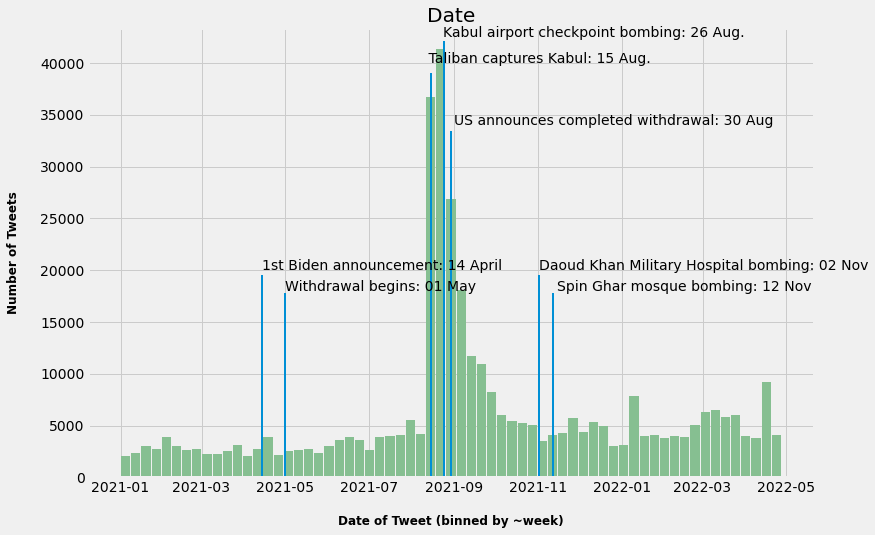

In [7]:
ax = tweets_data.hist(column="Date", bins=65, figsize=(12, 8), color='#86bf91', zorder=2, rwidth=0.9)  
ax = ax[0]
for x in ax:
    # Set x-axis label
    x.set_xlabel("Date of Tweet (binned by ~week)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Tweets", labelpad=20, weight='bold', size=12)

plt.axvline(dt.datetime(2021, 4, 14), ymax=0.45, linewidth=2)
plt.text(dt.datetime(2021, 4, 14), 20000, "1st Biden announcement: 14 April", rotation=0)

plt.axvline(dt.datetime(2021, 5, 1), ymax=0.41, linewidth=2)
plt.text(dt.datetime(2021, 5, 1), 18000, "Withdrawal begins: 01 May", rotation=0)

plt.axvline(dt.datetime(2021, 8, 15), ymax=.9, linewidth=2)
plt.text(dt.datetime(2021, 8, 10), 40000, " Taliban captures Kabul: 15 Aug.", rotation=0)

plt.axvline(dt.datetime(2021, 8, 25), ymax=0.97, linewidth=2)
plt.text(dt.datetime(2021, 8, 24), 42500, "Kabul airport checkpoint bombing: 26 Aug.", rotation=0)

plt.axvline(dt.datetime(2021, 8, 30), ymax=0.77, linewidth=2)
plt.text(dt.datetime(2021, 9, 1), 34000, "US announces completed withdrawal: 30 Aug", rotation=0)

# plt.axvline(dt.datetime(2021, 9, 9), ymax=0.62, linewidth=2)
# plt.text(dt.datetime(2021, 9, 9), 25000, "Kabul International Airport reopens: 09 Sept", rotation=90)

plt.axvline(dt.datetime(2021, 11, 2), ymax=0.45, linewidth=2)
plt.text(dt.datetime(2021, 11, 2), 20000, "Daoud Khan Military Hospital bombing: 02 Nov", rotation=0)

plt.axvline(dt.datetime(2021, 11, 12), ymax=0.41, linewidth=2)
plt.text(dt.datetime(2021, 11, 15), 18000, "Spin Ghar mosque bombing: 12 Nov", rotation=0)

# plt.axvline(dt.datetime(2021, 12, 26), ymax=0.62, linewidth=2)
# plt.text(dt.datetime(2021, 12, 26), 25000, "Taliban dissolves Afghanistan's Independent Election Commission: 26 Dec", rotation=45)

plt.gcf().subplots_adjust(left=0.11, bottom=0.1, )
plt.savefig('tweetsPerMonth.png')

This looks quite reasonable. <br>
I do want to shift the window I am collecting from, though. Starting 01 Jan seems good: we have the 4 months from then until the first Biden announcement as a baseline. But there is not long enough at the tail end to see if the trend will return to the baseline. Maybe extend until 01 April 2022?

Yes, extending it seems to indicate that the volume leveled off again, but at a somewhat higher level. This is interesting.

In [8]:
tweets_data.tail()

,Date,Content,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384550,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,Toronto - Baku,0,0,1,0,NaN
384551,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,Toronto,0,0,0,0,NaN
384552,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","Wakefield, England",1,0,0,0,NaN
384553,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,Toronto - Baku,1,0,0,0,NaN
384554,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,NaN,0,0,3,0,NaN


## Null values

In [9]:
tweets_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384555 entries, 0 to 384554
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Date          384555 non-null  datetime64[ns, UTC]
 1   Content       384555 non-null  object             
 2   Location      264461 non-null  object             
 3   ReplyCount    384555 non-null  int64              
 4   RetweetCount  384555 non-null  int64              
 5   LikeCount     384555 non-null  int64              
 6   QuoteCount    384555 non-null  int64              
 7   Hashtags      98665 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 23.5+ MB


C:\Users\rnocker\AppData\Local\Temp\ipykernel_18940\2507665225.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  tweets_data.info(null_counts=True)


Note that we have null values in: Location, (QuotedTweet,) and Hashtags columns. Lets see what the values are in those columns.

In [10]:
print(tweets_data['Location'].unique())    # 83,072 missing
# print(tweets_data['QuotedTweet'].unique()) # 245,195 missing - this column has been dropped
print(tweets_data['Hashtags'].unique())    # 193,837 missing

[nan 'Africa.' 'New York 🔁 Zurich 🔁 London ' ... 'MY BALCONY '
 'On the edge of my seat.' 'Texas/Tennessee ']
[nan "['Ukrainian', 'refugee', 'RETWEET']" "['Afghanistan']" ...
 "['housing', 'quotarefugees', 'Finland']"
 "['minorityCommunity', 'KashmirValley', 'Article370', 'CAA']"
 "['realitycheck']"]


Location is all over the place, as expected. Roughly 1/3 of tweets are not associated with a (account) location, which is unfortunate. I was hoping to restrict to Americans, but the reltatively high number of tweets without location makes this difficult, especially as I do not know if the lack is due to a pertinant characteristic/trait. Can't really think of a good way to fill that. I'll probably take this out before modelling, but may want it for other cleaning or just to think about it more. I'll fill it with "English-speaking" for now.

QuotedTweet has a link to a referenced tweet. This is pretty rare. I think we can probably remove this column.

Hastags are all over the place. I do not want to delete this as 1) hashtags are relevant for sentiment, and 2) I may use it later to delete irrelevant tweets or see what was happening at a specific date. So I'll just fill it with "No hashtag."

In [11]:
#tweets_data.drop(["QuotedTweet"], inplace = True, axis = 1)

tweets_data["Hashtags"].fillna("No hashtags", inplace=True)
tweets_data["Location"].fillna("English-speaking", inplace=True)

print(tweets_data.info(show_counts=True))
print(tweets_data["Hashtags"].value_counts())  
print(tweets_data["Location"].value_counts())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384555 entries, 0 to 384554
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Date          384555 non-null  datetime64[ns, UTC]
 1   Content       384555 non-null  object             
 2   Location      384555 non-null  object             
 3   ReplyCount    384555 non-null  int64              
 4   RetweetCount  384555 non-null  int64              
 5   LikeCount     384555 non-null  int64              
 6   QuoteCount    384555 non-null  int64              
 7   Hashtags      384555 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 23.5+ MB
None
No hashtags                                                                                                                    285890
['StandWithIraqiRefugees']                                                                                          

# Initial Cleaning
First, create a copy of the "Content" that we can clean while...
* removing the https web addresses (there is one at the end of most tweets), and 
* @mentions<br>

and save them to their own columns, respectively.<br>

Then remove stealth retweets. <br>
Then we can count the number of capital letters. Note that I can't just lowercase the tweet: all-caps is relevant to sentiment.<br>

## Put web addresses and @mentions in their own columns

In [12]:
# ONLY do this ONCE!
tweets_data.insert(loc=2, column='ContentClean', value="")
tweets_data.insert(loc=3, column='https', value="")
tweets_data.reset_index(drop=True, inplace=True)
tweets_data.tail()

,Date,Content,ContentClean,https,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384550,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,,,Toronto - Baku,0,0,1,0,No hashtags
384551,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,,,Toronto,0,0,0,0,No hashtags
384552,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...",,,"Wakefield, England",1,0,0,0,No hashtags
384553,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,,,Toronto - Baku,1,0,0,0,No hashtags
384554,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,,,English-speaking,0,0,3,0,No hashtags


In [27]:
# This function starts with INPUT: reset index? and deletes the old index
# Takes ~ 2hrs 20min for 250,000 rows
aa.find_webs(tweets_data, "Content", "ContentClean", "https")
tweets_data.to_csv(os.path.join('archiveData', 'tweets_webs_03_05.csv'))

row count: 0
row count: 10000
row count: 20000
row count: 30000
row count: 40000
row count: 50000
row count: 60000
row count: 70000
row count: 80000
row count: 90000
row count: 100000
row count: 110000
row count: 120000
row count: 130000
row count: 140000
row count: 150000
row count: 160000
row count: 170000
row count: 180000
row count: 190000
row count: 200000
row count: 210000
row count: 220000
row count: 230000
row count: 240000
row count: 250000
row count: 260000
row count: 270000
row count: 280000
row count: 290000
row count: 300000
row count: 310000
row count: 320000
row count: 330000
row count: 340000
row count: 350000
row count: 360000
row count: 370000
row count: 380000


In [16]:
tweets_data["https"].value_counts()

https://t.co/iMWOPpJgtf    66
https://t.co/3d3SYpGgeR    45
https://t.co/Esdz9MRv1w    42
https://t.co/YCx0ESnkD5    38
https://t.co/Omga1SuXPQ    31
                           ..
https://t.co/MPL2MqVzVO     1
https://t.co/HWGqGHBRGH     1
https://t.co/BBcqvLJYr7     1
https://t.co/uNaPFOhiUp     1
https://t.co/9NvC8mkf6r     1
Name: https, Length: 183967, dtype: int64

In [17]:
tweets_data.tail()

,Date,Content,ContentClean,https,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384550,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,NaN,Toronto - Baku,0,0,1,0,No hashtags
384551,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,20201230: Bryony Lau: Canada now resettles mor...,https://t.co/UzF1CVFfgV,Toronto,0,0,0,0,No hashtags
384552,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","@joemcafield Yep, just spent 40 mins (and coun...",NaN,"Wakefield, England",1,0,0,0,No hashtags
384553,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,https://t.co/9NvC8mkf6r,Toronto - Baku,1,0,0,0,No hashtags
384554,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,NaN,English-speaking,0,0,3,0,No hashtags


### Now do it for @mentions
Removing @mentions and replacing with a space.


Can also replace the @ mentions with a code by changing two lines in the aa.findats():
- NOTE: regex matches the end of line as a whitespace, so @mentions at the end of a tweet will get replaced with @mm
- Fix with: 
  - all_at = re.findall("@[A-Za-z0-9_]+", text)
  - df.loc[i, clean_col] = re.sub("@[A-Za-z0-9_]+","@m", text)

I'm not going to do this, as @mentions are not used in the analysis and might end up being unique identifiers for the tweets.

In [56]:
#UNPAUSE
tweets_data = pd.read_csv("archiveData/tweets_webs_03_05.csv", header=0, index_col=0)

In [57]:
tweets_data.tail()

,Date,Content,ContentClean,https,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384550,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,NaN,Toronto - Baku,0,0,1,0,No hashtags
384551,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,20201230: Bryony Lau: Canada now resettles mor...,https://t.co/UzF1CVFfgV,Toronto,0,0,0,0,No hashtags
384552,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","@joemcafield Yep, just spent 40 mins (and coun...",NaN,"Wakefield, England",1,0,0,0,No hashtags
384553,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,https://t.co/9NvC8mkf6r,Toronto - Baku,1,0,0,0,No hashtags
384554,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,NaN,English-speaking,0,0,3,0,No hashtags


In [58]:
# ONLY do this ONCE!
tweets_data.insert(loc=4, column='Mentions', value="")
tweets_data.tail()

,Date,Content,ContentClean,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384550,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,NaN,,Toronto - Baku,0,0,1,0,No hashtags
384551,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,20201230: Bryony Lau: Canada now resettles mor...,https://t.co/UzF1CVFfgV,,Toronto,0,0,0,0,No hashtags
384552,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","@joemcafield Yep, just spent 40 mins (and coun...",NaN,,"Wakefield, England",1,0,0,0,No hashtags
384553,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,https://t.co/9NvC8mkf6r,,Toronto - Baku,1,0,0,0,No hashtags
384554,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,NaN,,English-speaking,0,0,3,0,No hashtags


In [59]:
# NOTE: this function starts with resetting the index  (~ 4 min on Surface, ~ 1 min on Dell)
aa.find_ats(tweets_data, clean_col="ContentClean", at_col="Mentions")
tweets_data.to_csv(os.path.join('archiveData', 'tweets_ats_03_05.csv'))

replacing names: 0
replacing names: 10000
replacing names: 20000
replacing names: 30000
replacing names: 40000
replacing names: 50000
replacing names: 60000
replacing names: 70000
replacing names: 80000
replacing names: 90000
replacing names: 100000
replacing names: 110000
replacing names: 120000
replacing names: 130000
replacing names: 140000
replacing names: 150000
replacing names: 160000
replacing names: 170000
replacing names: 180000
replacing names: 190000
replacing names: 200000
replacing names: 210000
replacing names: 220000
replacing names: 230000
replacing names: 240000
replacing names: 250000
replacing names: 260000
replacing names: 270000
replacing names: 280000
replacing names: 290000
replacing names: 300000
replacing names: 310000
replacing names: 320000
replacing names: 330000
replacing names: 340000
replacing names: 350000
replacing names: 360000
replacing names: 370000
replacing names: 380000


In [60]:
tweets_data.tail()

,Date,Content,ContentClean,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384550,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,"it is not we who prove this, but the R...",NaN,"@StayFierce1973, @Lala43463561, @Raufmustafaye...",Toronto - Baku,0,0,1,0,No hashtags
384551,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,20201230: Bryony Lau: Canada now resettles mor...,https://t.co/UzF1CVFfgV,,Toronto,0,0,0,0,No hashtags
384552,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","Yep, just spent 40 mins (and counting) tryin...",NaN,@joemcafield,"Wakefield, England",1,0,0,0,No hashtags
384553,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,excuse me? how do you explain the doc...,https://t.co/9NvC8mkf6r,"@StayFierce1973, @Raufmustafaye10, @alliemark5...",Toronto - Baku,1,0,0,0,No hashtags
384554,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,"Also, there are many c...",NaN,"@postcovid_CH, @WHO, @pahowho, @WHOWPRO, @WHOA...",English-speaking,0,0,3,0,No hashtags


## Remove stealth retweets

In [106]:
tweets_data.insert(loc=5, column='RT', value="")
aa.find_rts(tweets_data, clean_col="ContentClean", rt_col="RT")
tweets_data.to_csv(os.path.join('archiveData', 'tweets_rts_19b_04.csv'))

# NOTE: This might be able to be sped up using the copy method instead of dropping rows. How long does this fn take?

There are 314 stealth retweets in the data set.
There are 0 stealth retweets REMAINING.


In [107]:
tweets_data.drop("RT", inplace = True, axis = 1)
tweets_data.tail()

,Date,Content,ContentClean,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384236,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,"it is not we who prove this, but the R...",,"@StayFierce1973, @Lala43463561, @Raufmustafaye...",Toronto - Baku,0,0,1,0,No hashtags
384237,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,20201230: Bryony Lau: Canada now resettles mor...,https://t.co/UzF1CVFfgV,,Toronto,0,0,0,0,No hashtags
384238,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","Yep, just spent 40 mins (and counting) tryin...",,@joemcafield,"Wakefield, England",1,0,0,0,No hashtags
384239,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,excuse me? how do you explain the doc...,https://t.co/9NvC8mkf6r,"@StayFierce1973, @Raufmustafaye10, @alliemark5...",Toronto - Baku,1,0,0,0,No hashtags
384240,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,"Also, there are many c...",,"@postcovid_CH, @WHO, @pahowho, @WHOWPRO, @WHOA...",English-speaking,0,0,3,0,No hashtags


## Now, count uppercase

In [108]:
tweets_data.insert(loc=3, column='n_CapLetters', value="")
tweets_data.insert(loc=4, column='CapsRatio', value="")
tweets_data.insert(loc=5, column='AllCapWords', value="")
tweets_data.head()

,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
0,2022-04-27 09:37:51+00:00,@Carolyn61957800 Thank you so much for your co...,"Thank you so much for your condolences, unfo...",,,,,@Carolyn61957800,English-speaking,0,0,0,0,No hashtags
1,2022-04-27 09:33:35+00:00,"@aedcelectricity it's over 48hrs, there's no e...","it's over 48hrs, there's no electricity in A...",,,,,"@aedcelectricity, @TCN_NIGERIA, @MBuhari, @Pro...",Africa.,0,0,0,0,No hashtags
2,2022-04-27 09:29:47+00:00,@TheEllenShow @Bethenny What is the difference...,What is the difference between Afghan refu...,,,,,"@TheEllenShow, @Bethenny",English-speaking,0,0,0,0,No hashtags
3,2022-04-27 09:25:42+00:00,@aedcelectricity @OnyieLifted Same feeder as a...,Same feeder as apo Resettlement?,,,,,"@aedcelectricity, @OnyieLifted",English-speaking,1,0,0,0,No hashtags
4,2022-04-27 09:12:31+00:00,If you want to help with #Ukrainian #refugee r...,If you want to help with #Ukrainian #refugee r...,,,,,,New York 🔁 Zurich 🔁 London,1,4,6,0,"['Ukrainian', 'refugee', 'RETWEET']"


In [ ]:
# NOTE: This function starts with an input: to reset the index  ~ 1 hr 30 min (250000 rows) (3.5 hrs 380,000 rows)
# NOTE: CapsRatio is ratio of capital letters to ContentClean.
aa.count_caps(tweets_data, clean_col="ContentClean", n_caps_col="n_CapLetters", r_caps_col="CapsRatio", caps_col="AllCapWords")
tweets_data.to_csv(os.path.join('archiveData', 'tweets_caps_27b_04.csv'))
tweets_data.tail()

# Pause / Unpause: after initial cleaning
Use this to jump in after the main cleaning, to look at row content.

In [3]:
tweets_data = pd.read_csv(os.path.join('archiveData', 'tweets_caps_27b_04.csv'), header=0, index_col=0)
print(tweets_data.shape)

(384241, 14)


In [40]:
tweets_data.tail()

,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags
384236,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,"it is not we who prove this, but the R...",3,0.023438,NaN,NaN,"@StayFierce1973, @Lala43463561, @Raufmustafaye...",Toronto - Baku,0,0,1,0,No hashtags
384237,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,20201230: Bryony Lau: Canada now resettles mor...,8,0.029412,"UN""",https://t.co/UzF1CVFfgV,NaN,Toronto,0,0,0,0,No hashtags
384238,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","Yep, just spent 40 mins (and counting) tryin...",6,0.056075,🙄🤦‍♀️😁\nHNY,NaN,@joemcafield,"Wakefield, England",1,0,0,0,No hashtags
384239,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,excuse me? how do you explain the doc...,4,0.022989,NaN,https://t.co/9NvC8mkf6r,"@StayFierce1973, @Raufmustafaye10, @alliemark5...",Toronto - Baku,1,0,0,0,No hashtags
384240,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,"Also, there are many c...",7,0.023333,I,NaN,"@postcovid_CH, @WHO, @pahowho, @WHOWPRO, @WHOA...",English-speaking,0,0,3,0,No hashtags


# Strategy for non-relevant rows in the main dataframe
I did not want to further complicate the twitter search, so I gathered everything related to all refugees. Now it's time to get rid of rows that are not about Afghani refugees. So, find rows that relate to other refugee situations AND not Afghanistan, and remove them.

First, I need a list of safe words: words that will **keep** a tweet in the dataset by default (list made via the iterations of searching below)

SEND these rows to a keep_df. Then...

Then, **remove** anything else that has one of the following terms (list made via the iterations of searching below)

SEE what's left.

**GO TO: exploreRows notebook**

# Get rid of non-relevant rows in the main dataframe

Inclusion words: words that will **keep** a tweet in the dataset by default:<br>
* all variataions of \*afg*, 
* "kabul", 

Maybe secondary:
* "airport", 
* "interpreter", "interpreters", 
* "evacuation", 
* "allies".

SEND these rows to a keep_df. <br>
THEN...

Exclusion words: **remove** anything else that has one of the following terms: <br>
"arkham", "gotham", "batman", 
"rohinga", "rohingya", 
"syrian", "syria", 
"tamil", 
"tigray", 
"sudan", "sudanese", 
"somalia", "somali", 
"congo", "congalese", "congolese", 
"eritrea", "eritrean", 
"apo", 
"nigeria", "nigerian", 
"uganda", "ugandan", 
"rwamwanja", 
"kirwa",  
"biloela", 
"iraq", "iraqi", 
"yemen", "yemeni", 
"rwanda", "rwandan", 
"kenya", "kenyan", 
"kashmir", "kashmiri", 
"palestine", "palestinian", 
"haiti", "haitian", 
"tesla", "TSLA".


CHECK TERMS:
"patience", "continued patience",
"rental", "tenant", "tenants",
"buddhist", "hindu",
"vietnam", "vietnamese",
"cambodia", "cambodian",
"indonesia", "indonesian",
"fire", "flood", "landslide"]


SEE what's left.

In [41]:
# This should pull the cleanest version of the data (as .csv) possible into a new df
tweets_for_eval = pd.read_csv(os.path.join('archiveData', 'tweets_caps_27b_04.csv'), header=0, index_col=0)
# tweets_for_eval.drop("Unnamed: 0.1", axis = 1, inplace=True)

# Add a column that can be used to flag rows to keep, default it to "no"
tweets_for_eval["Flag"] = "no"
tweets_for_eval.tail()

,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
384236,2021-01-01 01:55:12+00:00,@StayFierce1973 @Lala43463561 @Raufmustafaye10...,"it is not we who prove this, but the R...",3,0.023438,NaN,NaN,"@StayFierce1973, @Lala43463561, @Raufmustafaye...",Toronto - Baku,0,0,1,0,No hashtags,no
384237,2021-01-01 01:07:04+00:00,20201230: Bryony Lau: Canada now resettles mor...,20201230: Bryony Lau: Canada now resettles mor...,8,0.029412,"UN""",https://t.co/UzF1CVFfgV,NaN,Toronto,0,0,0,0,No hashtags,no
384238,2021-01-01 00:43:07+00:00,"@joemcafield Yep, just spent 40 mins (and coun...","Yep, just spent 40 mins (and counting) tryin...",6,0.056075,🙄🤦‍♀️😁\nHNY,NaN,@joemcafield,"Wakefield, England",1,0,0,0,No hashtags,no
384239,2021-01-01 00:10:26+00:00,@StayFierce1973 @Raufmustafaye10 @alliemark5 @...,excuse me? how do you explain the doc...,4,0.022989,NaN,https://t.co/9NvC8mkf6r,"@StayFierce1973, @Raufmustafaye10, @alliemark5...",Toronto - Baku,1,0,0,0,No hashtags,no
384240,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,"Also, there are many c...",7,0.023333,I,NaN,"@postcovid_CH, @WHO, @pahowho, @WHOWPRO, @WHOA...",English-speaking,0,0,3,0,No hashtags,no


In [42]:
#print(aa.term_check("airport", tweets_for_eval))
print(aa.term_check("airport", tweets_for_eval))

('airport', 1882)


In [43]:
# create an empty df for the keeper rows
tweets_keep = pd.DataFrame()
tweets_keep.tail()

""


## Marking rows with primary inclusion terms

In [44]:
# appending and dropping rows: ~ 4 hrs+
# creating a flag column and copying from there: ~ 3 min

# set up
orig_rows = tweets_for_eval.shape[0]

# reset the index so that it can be used for subsetting via enumeration
tweets_for_eval.reset_index(drop=True, inplace=True)

# flag all rows that have an inclusion term as "yes"
aa.flag_term("afg", tweets_for_eval, clean_col="ContentClean", flag_col="Flag")
aa.flag_term("kabul", tweets_for_eval, clean_col="ContentClean", flag_col="Flag", indx_warning=False)
print("flaging done")

# Keep a list of the indexes of all the flagged rows, for comparison
keep_index = tweets_for_eval[(tweets_for_eval["Flag"] == "yes")].index

# Put all rows flagged "yes" in the tweets_keep df and the ones marked "no" in the eval df
tweets_keep = tweets_for_eval[tweets_for_eval["Flag"] == 'yes'].copy()  #.reset_index(drop=True, inplace=True)
tweets_for_eval = tweets_for_eval[tweets_for_eval["Flag"] == 'no'].copy()  #.reset_index(drop=True, inplace=True)

# Print off some checks
#print("Yes counter:", yes_counter)
print("Number of rows in keep_index:", len(keep_index))
print()
print("Rows in tweets_keep:", tweets_keep.shape[0])
print("Rows in tweets_for_eval:", tweets_for_eval.shape[0])
print("All rows in one or other df:", tweets_keep.shape[0] + tweets_for_eval.shape[0] == orig_rows)
print()
print("Value count, eval df:", tweets_for_eval["Flag"].value_counts())
print("Value count, keep df:", tweets_keep["Flag"].value_counts())

# save everything to temp csv files
tweets_keep.to_csv(os.path.join('archiveData', "tweets_keep_temp.csv"))
tweets_for_eval.to_csv(os.path.join('archiveData', "tweets_eval_temp.csv"))
tweets_keep.tail()

# keep: 227,728

yes    227112
no     157129
Name: Flag, dtype: int64
yes    227728
no     156513
Name: Flag, dtype: int64
flaging done
Number of rows in keep_index: 227728

Rows in tweets_keep: 227728
Rows in tweets_for_eval: 156513
All rows in one or other df: True

Value count, eval df: no    156513
Name: Flag, dtype: int64
Value count, keep df: yes    227728
Name: Flag, dtype: int64


,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
384194,2021-01-01 11:27:39+00:00,Germany;\nAfghan 'refugee' https://t.co/GoW8wE...,Germany;\nAfghan 'refugee' year old.\nGets b...,7,0.050360,NaN,"https://t.co/GoW8wEEUqM.11, https://t.co/DDAE7...",NaN,🍌 republic of The Netherlands,0,0,0,0,No hashtags,yes
384227,2021-01-01 06:28:00+00:00,"Change a word, seriously.\nImagine this: a nat...","Change a word, seriously.\nImagine this: a nat...",10,0.035714,NaN,NaN,NaN,Australia,2,5,13,1,No hashtags,yes
384232,2021-01-01 04:41:08+00:00,"Ending 2020 on an uplifting note, we met Abbas...","Ending 2020 on an uplifting note, we met Abbas...",11,0.045082,NaN,https://t.co/f2JnKO6tYE,NaN,"Aventura, FL",0,3,12,0,No hashtags,yes
384234,2021-01-01 03:15:01+00:00,“They commanded us to go to Lipa. We don’t kno...,“They commanded us to go to Lipa. We don’t kno...,4,0.028986,NaN,https://t.co/m2xNSKdv4w,@Guiriguanche,Finland,0,1,0,0,No hashtags,yes
384240,2021-01-01 00:06:57+00:00,@postcovid_CH @WHO @pahowho @WHOWPRO @WHOAFRO ...,"Also, there are many c...",7,0.023333,I,NaN,"@postcovid_CH, @WHO, @pahowho, @WHOWPRO, @WHOA...",English-speaking,0,0,3,0,No hashtags,yes


### PAUSE / UNPAUSE

In [137]:
# Unpause
tweets_keep = pd.read_csv(os.path.join('archiveData', "tweets_keep_temp.csv"), header=0, index_col=0)
tweets_for_eval = pd.read_csv(os.path.join('archiveData', "tweets_eval_temp.csv"), header=0, index_col=0)


## Marking rows with exclusion terms
Let's see if we can make this better: drop rows with exclusion terms from the eval df, then see if the df has above 80% relevancy.

In [45]:
tweets_for_eval.Flag.value_counts()

no    156513
Name: Flag, dtype: int64

In [46]:
excluded = ["arkham", "gotham", "batman", "rohinga", "rohingya",
    "syrian", "syria", "tamil", "tigray", "sudan", "sudanese", "somalia", "somali",
    "congo", "congalese", "congolese", "eritrea", "eritrean", "apo", "nigeria", "nigerian",
    "uganda", "ugandan", "rwamwanja", "kirwa", "biloela", "iraq", "iraqi",
    "yemen", "yemeni", "rwanda", "rwandan", "kenya", "kenyan", "kashmir", "kashmiri",
    "palestine", "palestinian", "haiti", "haitian", "tesla", "TSLA", "ukraine", "ukrainian",
    "your patience", "your continued patience", "rental", "tenant", "tenants", "buddhist", "hindu",
    "armenia", "australia", "vietnam", "cambodia", "indonesia", "fire", "flood", "landslide", 
    "cyclone"]

# Add "israel"?

In [47]:
# Flag the relevant rows: yes = drop
# NOTE: This function only flags positive instances; it may be run multiple times with different terms
# NOTE: This function starts with an input: to reset the index
for term in excluded:
    aa.flag_term(term, tweets_for_eval, clean_col="ContentClean", flag_col="Flag", indx_warning=False)
    print(term)

# keep just the "no" rows in the tweets_for_eval df
print("start:", tweets_for_eval.shape)
tweets_for_eval = tweets_for_eval[tweets_for_eval["Flag"] == 'no'].copy()  #.reset_index(drop=True, inplace=True)
print("finish", tweets_for_eval.shape)


no     156508
yes         5
Name: Flag, dtype: int64
arkham
no     156504
yes         9
Name: Flag, dtype: int64
gotham
no     156503
yes        10
Name: Flag, dtype: int64
batman
no     156500
yes        13
Name: Flag, dtype: int64
rohinga
no     155985
yes       528
Name: Flag, dtype: int64
rohingya
no     154208
yes      2305
Name: Flag, dtype: int64
syrian
no     153361
yes      3152
Name: Flag, dtype: int64
syria
no     153021
yes      3492
Name: Flag, dtype: int64
tamil
no     151906
yes      4607
Name: Flag, dtype: int64
tigray
no     151683
yes      4830
Name: Flag, dtype: int64
sudan
no     151683
yes      4830
Name: Flag, dtype: int64
sudanese
no     151511
yes      5002
Name: Flag, dtype: int64
somalia
no     151273
yes      5240
Name: Flag, dtype: int64
somali
no     151151
yes      5362
Name: Flag, dtype: int64
congo
no     151151
yes      5362
Name: Flag, dtype: int64
congalese
no     151151
yes      5362
Name: Flag, dtype: int64
congolese
no     150505
yes      6008
Name

## Marking rows with secondary inclusion terms

In [49]:
# Keep all versions of *afg* (~3 hrs) --> yes = keep
tweets_for_eval["Flag"] = "no"

# Flag the relevant rows: yes = keep
safe_words = [" siv ", " sivs ", " siv's ", "special immigrant visa", "interpreter", "translator"] # "allies"
for term in safe_words:
    # NOTE: This function only flags positive instances; it may be run multiple times with different terms
    # NOTE: This function resets the index
    aa.flag_term(term, tweets_for_eval, clean_col="ContentClean", flag_col="Flag", indx_warning=False)

print(tweets_keep.shape)
print(tweets_for_eval.shape)
print()

# copy the "yes" rows to a temp df, then combine them with the other keeper rows in tweets_keep df
tweets_keep_temp = tweets_for_eval[tweets_for_eval["Flag"] == 'yes'].copy()  #.reset_index(drop=True, inplace=True)
frames = [tweets_keep, tweets_keep_temp]
tweets_keep = pd.concat(frames)

# keep just the "no" rows in the tweets_for_eval df
tweets_for_eval = tweets_for_eval[tweets_for_eval["Flag"] == 'no'].copy()  #.reset_index(drop=True, inplace=True)

# Print off some checks
print("Rows in tweets_keep:", tweets_keep.shape[0])
print("Rows in tweets_for_eval:", tweets_for_eval.shape[0])
print()
print("Value count, eval df:", tweets_for_eval["Flag"].value_counts())
print("Value count, keep df:", tweets_keep["Flag"].value_counts())

# Save everything to csv temp files
tweets_keep.to_csv(os.path.join('archiveData', "tweets_keep_temp.csv"))
tweets_for_eval.to_csv(os.path.join('archiveData', "tweets_eval_temp.csv"))
tweets_keep.tail()

no     92407
yes     1680
Name: Flag, dtype: int64
no     92295
yes     1792
Name: Flag, dtype: int64
no     92256
yes     1831
Name: Flag, dtype: int64
no     92175
yes     1912
Name: Flag, dtype: int64
no     91893
yes     2194
Name: Flag, dtype: int64
no     91409
yes     2678
Name: Flag, dtype: int64
(227728, 15)
(94087, 15)

Rows in tweets_keep: 230406
Rows in tweets_for_eval: 91409
All rows in one or other df: False

Value count, eval df: no    91409
Name: Flag, dtype: int64
Value count, keep df: yes    230406
Name: Flag, dtype: int64


,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
88577,2021-02-05 19:37:20+00:00,"Last night, the Biden Administration proved it...","Last night, the Biden Administration proved it...",14,0.054054,"(SIV), U.S., U.S.","https://t.co/uqKiBNX4oS, https://t.co/5xeuUwiTVd",NaN,Washington DC Metro Area,0,0,1,0,No hashtags,yes
88754,2021-02-05 14:06:08+00:00,Our troops are safer when our allies trust tha...,Our troops are safer when our allies trust tha...,6,0.023438,SIV,NaN,NaN,"Washington, DC",0,0,3,0,No hashtags,yes
88983,2021-02-05 02:02:42+00:00,Great News: @POTUS Announces EO for “Rebuildin...,Great News: Announces EO for “Rebuilding and...,16,0.081218,"EO, SIV",https://t.co/Nzjo9OxAlv,"@POTUS, @n1leftbehind","Washington, DC",0,0,3,1,No hashtags,yes
89893,2021-01-31 15:46:34+00:00,Putting a consoling arm around the grieve-stri...,Putting a consoling arm around the grieve-stri...,2,0.008032,NaN,https://t.co/VvD3N896GP,"@BWallaceMP, @TomTugendhat, @michaelgove","Kabul, afghanistan",0,0,3,0,No hashtags,yes
93847,2021-01-03 18:05:31+00:00,@ScottEshom @n1leftbehind @michaelgwaltz An in...,An interpreter shouldn't have to have th...,4,0.022472,SIV,NaN,"@ScottEshom, @n1leftbehind, @michaelgwaltz","Dallas, TX",0,0,1,0,No hashtags,yes


### PAUSE / UNPAUSE

In [58]:
#PAUSE
tweets_keep.to_csv(os.path.join('archiveData', "tweets_keep_27b_04.csv"))
tweets_for_eval.to_csv(os.path.join('archiveData', "tweets_eval_27b_04.csv"))

In [3]:
# UNPAUSE
tweets_keep = pd.read_csv(os.path.join('archiveData', "tweets_keep_27b_04.csv"), header=0, index_col=0)
tweets_for_eval = pd.read_csv(os.path.join('archiveData', "tweets_eval_27b_04.csv"), header=0, index_col=0)


# Get rid of duplicate tweets
There are a fair number of tweets that are identical, but sent to different @mentions. I don't need this to show up multiple times in the dataset.

In [4]:
tweets_keep["Dupl"] = ""
tweets_keep["Dupl"] = tweets_keep.duplicated(subset="ContentClean", keep='first')
tweets_keep_dedup = tweets_keep[tweets_keep["Dupl"] == False].copy()

print(tweets_keep.shape)
print(tweets_keep_dedup.shape)

# (230406, 15)
# (205534, 15)

(230406, 16)
(205534, 16)


In [5]:
tweets_keep.drop("Dupl", axis = 1, inplace=True)
tweets_keep_dedup.drop("Dupl", axis = 1, inplace=True)
tweets_keep.head()

,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
0,2022-04-27 09:37:51+00:00,@Carolyn61957800 Thank you so much for your co...,"Thank you so much for your condolences, unfo...",2,0.017391,NaN,NaN,@Carolyn61957800,English-speaking,0,0,0,0,No hashtags,yes
1,2022-04-27 09:29:47+00:00,@TheEllenShow @Bethenny What is the difference...,What is the difference between Afghan refu...,7,0.025180,NaN,NaN,"@TheEllenShow, @Bethenny",English-speaking,0,0,0,0,No hashtags,yes
2,2022-04-27 09:08:47+00:00,🗓️27 April 22\n📰Daily news brief | #Afghanista...,🗓️27 April 22\n📰Daily news brief | #Afghanista...,9,0.043062,NaN,"https://t.co/riCXmSn4Q6, https://t.co/lWu305Tw...",NaN,English-speaking,0,0,1,0,['Afghanistan'],yes
3,2022-04-27 08:47:50+00:00,Hazara refugees in Indonesia have suffered eno...,Hazara refugees in Indonesia have suffered eno...,6,0.027397,NaN,https://t.co/ANPekRW7FV,@UNGeneva,"Afghanistan, indonesia",0,1,5,0,['RescueAfgRefugees_Indonesia'],yes
4,2022-04-27 08:45:30+00:00,@A1nowy @DogtoothTyrant got mine for the famil...,"got mine for the family business, lot of p...",0,0.000000,NaN,NaN,"@A1nowy, @DogtoothTyrant",English-speaking,1,0,2,0,No hashtags,yes


### #Hashtag spam

There are a bunch of tweets from #RescueAfgRefugees and #EndTo10YearsInLimbo that are very similar but just bit different that are littering up the data set. Let's look at those.

In [6]:
tweets_keep_dedup["Hashtags"].value_counts

<bound method IndexOpsMixin.value_counts of 0                             No hashtags
1                             No hashtags
2                         ['Afghanistan']
3         ['RescueAfgRefugees_Indonesia']
4                             No hashtags
                       ...               
230401                        No hashtags
230402                        No hashtags
230403                        No hashtags
230404                        No hashtags
230405                        No hashtags
Name: Hashtags, Length: 205534, dtype: object>

In [18]:
tweets_keep_dedup["Flag"] = "no"
# aa.flag_term("RescueAfgRefugees", tweets_keep_dedup)
# aa.flag_term("10 years in limbo", tweets_keep_dedup, indx_warning=False)
# aa.flag_term("ten years in limbo", tweets_keep_dedup, indx_warning=False)
# aa.flag_term("waiting for 10 years", tweets_keep_dedup, indx_warning=False)
# aa.flag_term("waiting for ten years", tweets_keep_dedup, indx_warning=False)
# aa.flag_term("open your heart", tweets_keep_dedup, indx_warning=False)
# aa.flag_term("playing with our future", tweets_keep_dedup, indx_warning=False)
aa.flag_term("10YearsInLimbo", tweets_keep_dedup, indx_warning=False)

rescue_tweets = tweets_keep_dedup[tweets_keep_dedup["Flag"] == "yes"].copy()

no     203268
yes       821
Name: Flag, dtype: int64


In [19]:
rescue_tweets.shape
# #Rescue only: 1324
# #Rescue and terms: 1445
# 10YearsInLimbo: 821

(821, 15)

In [20]:
aa.labeler(rescue_tweets)

To end the session, enter 'ESC'


'User escape'

I think these can safely be removed from the dataset.

In [22]:
print(tweets_keep_dedup.shape)
tweets_keep_dedup = tweets_keep_dedup[tweets_keep_dedup["Flag"] == "no"].copy()
print(tweets_keep_dedup.shape)

# FIRST ROUND
# (205534, 15)
# (204089, 15)

# SECOND ROUND
# (204089, 15)
# (203268, 15)

(204089, 15)
(203268, 15)


## News sources

What about news sources? I'd like to get rid of them entirely, but that's not possible. I can look for things flagged #news, #worldnews, etc.

But is it worse to remove the flagged sources and leave the unflagged ones?

On the other hand, I will want to identify "neutral" stance, and I don't want the model to just learn that neutral = #news.

I guess take them out?

In [31]:
tweets_keep_dedup["Flag"] = "no"
aa.flag_term("#news", tweets_keep_dedup)
aa.flag_term("#internationalnews", tweets_keep_dedup, indx_warning=False)
aa.flag_term("#worldnews", tweets_keep_dedup, indx_warning=False)
aa.flag_term("#worldnews", tweets_keep_dedup, indx_warning=False)
aa.flag_term("#breaking", tweets_keep_dedup, indx_warning=False)
aa.flag_term("#report", tweets_keep_dedup, indx_warning=False)
# aa.flag_term("breaking: ", tweets_keep_dedup, indx_warning=False)
# aa.flag_term("report: ", tweets_keep_dedup, indx_warning=False)

rescue_tweets = tweets_keep_dedup[tweets_keep_dedup["Flag"] == "yes"].copy()
print(rescue_tweets.shape)

no     201642
yes      1626
Name: Flag, dtype: int64
no     201638
yes      1630
Name: Flag, dtype: int64
no     201610
yes      1658
Name: Flag, dtype: int64
no     201610
yes      1658
Name: Flag, dtype: int64
no     201384
yes      1884
Name: Flag, dtype: int64
no     201363
yes      1905
Name: Flag, dtype: int64
(1905, 15)


Most of these #hastags are pretty targeted. 

Unfortunately, "breaking: " is not as targeted: about 50%. It only flags 205 rows, though. Not sure if I should take them out.

In [32]:
print(tweets_keep_dedup.shape)
tweets_keep_dedup = tweets_keep_dedup[tweets_keep_dedup["Flag"] == "no"].copy()
print(tweets_keep_dedup.shape)

(203268, 15)
(201363, 15)


## Odds and Ends


In [45]:
tweets_keep_dedup["Flag"] = "no"
aa.flag_term("subscription", tweets_keep_dedup)
aa.flag_term("job posting", tweets_keep_dedup, indx_warning=False)
aa.flag_term("afghan whigs", tweets_keep_dedup, indx_warning=False)

rescue_tweets = tweets_keep_dedup[tweets_keep_dedup["Flag"] == "yes"].copy()
print(rescue_tweets.shape)

no     201355
yes         8
Name: Flag, dtype: int64
no     201352
yes        11
Name: Flag, dtype: int64
no     201334
yes        29
Name: Flag, dtype: int64
(29, 15)


In [9]:
print(tweets_keep_dedup.shape)
peek.head()

(201334, 15)


,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
0,2021-07-25 15:34:35+00:00,Considering the amount of ISIS terrorists let ...,Considering the amount of ISIS terrorists let ...,11,0.048673,ISIS,https://t.co/9S3cqIMsXe,NaN,"Wasaga Beach, Ontario",14,45,112,7,['cdnpoli'],y
1,2021-08-15 09:24:25+00:00,The US &amp; UK must offer asylum to all those...,The US &amp; UK must offer asylum to all those...,11,0.056995,"US, UK",NaN,NaN,York,0,0,0,0,No hashtags,y
2,2021-08-26 16:25:08+00:00,#Rwanda welcomes Afghan refugee students | @ec...,#Rwanda welcomes Afghan refugee students | |...,2,0.040000,NaN,"https://t.co/DtOmeDGeBF, https://t.co/VyEN6HQ9Je",@ecofinagency,Afrique,0,0,5,0,['Rwanda'],y
3,2021-09-01 19:23:54+00:00,@PaulWDrake @PawsofWarUSA But yet non vetted A...,But yet non vetted Afghan’s are at McGuire...,13,0.127451,"AFB, NJ.",NaN,"@PaulWDrake, @PawsofWarUSA",English-speaking,0,0,2,0,No hashtags,y
4,2021-08-15 15:20:39+00:00,The failure to not have an SIV evacuation plan...,The failure to not have an SIV evacuation plan...,11,0.058511,"SIV, NSC/JCS",NaN,NaN,English-speaking,3,5,46,0,No hashtags,y


In [7]:
peek = aa.subset_gen(tweets_keep_dedup, 50)
#peek = aa.subset_gen(rescue_tweets, 50)
aa.labeler(peek, lab="Flag")

a dataframe and temp_subset_gen.csv of length 50 have been created
To end the labler session, enter 'ESC'


y    42
n     8
Name: Flag, dtype: int64

In [8]:
8/50

0.16

So, this dataset should be over 80% relevant rows. That meets the target, but could be better.

# Now might be a good time to do some labeling
This is a very readable format.

### SAVE for LABELING

In [47]:
# PAUSE
tweets_keep_dedup.reset_index(drop=True, inplace=True)
tweets_keep_dedup.to_csv(os.path.join('archiveData', "tweets_to_label_05_01.csv"))

### PAUSE / UNPAUSE

In [3]:
# PAUSE
# see above

# UNPAUSE
tweets_keep_dedup = pd.read_csv(os.path.join('archiveData', "tweets_to_label_05_01.csv"), header=0, index_col=0)

### Set up for coding
1. Make an id column - separate from the index and that doesn't get overwritten
2. Take a random subset of 1,000 rows for labeling
    1. Put the 1,000 in a labeled dataset
    2. Remove the 1,000 from the unlabeled dataset

In [68]:
# Make ID column
tweets_keep_dedup.insert(loc=0, column='id_stable', value=tweets_keep_dedup.index)
tweets_keep_dedup.head()

,id_stable,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
0,0,2022-04-27 09:37:51+00:00,@Carolyn61957800 Thank you so much for your co...,"Thank you so much for your condolences, unfo...",2,0.017391,NaN,NaN,@Carolyn61957800,English-speaking,0,0,0,0,No hashtags,no
1,1,2022-04-27 09:29:47+00:00,@TheEllenShow @Bethenny What is the difference...,What is the difference between Afghan refu...,7,0.025180,NaN,NaN,"@TheEllenShow, @Bethenny",English-speaking,0,0,0,0,No hashtags,no
2,2,2022-04-27 09:08:47+00:00,🗓️27 April 22\n📰Daily news brief | #Afghanista...,🗓️27 April 22\n📰Daily news brief | #Afghanista...,9,0.043062,NaN,"https://t.co/riCXmSn4Q6, https://t.co/lWu305Tw...",NaN,English-speaking,0,0,1,0,['Afghanistan'],no
3,3,2022-04-27 08:45:30+00:00,@A1nowy @DogtoothTyrant got mine for the famil...,"got mine for the family business, lot of p...",0,0.000000,NaN,NaN,"@A1nowy, @DogtoothTyrant",English-speaking,1,0,2,0,No hashtags,no
4,4,2022-04-27 08:27:05+00:00,@Amy_Siskind Germany is displacing Afghan refu...,Germany is displacing Afghan refugees to mak...,6,0.033149,NaN,NaN,"@Amy_Siskind, @GermanyDiplo",English-speaking,0,0,0,0,No hashtags,no


In [69]:
# set random seed for reproducibility
rng = rand.default_rng(1080)

# create an index list of random numbers between 0 and the length of the dataframe
# Note: This has duplicate numbers; so 1002 gets 1000 unique row numbers
label_indx = rng.integers(low=0, high=tweets_keep_dedup.shape[0], size=1002)

# Flag those rows
tweets_keep_dedup["Flag"] = "no"
for i in label_indx:
    tweets_keep_dedup.loc[i,"Flag"] = "yes"

# create new dataframes with just the un/flagged rows
data_labeled = tweets_keep_dedup[tweets_keep_dedup["Flag"] == "yes"].copy()
data_unlabeled = tweets_keep_dedup[tweets_keep_dedup["Flag"] == "no"].copy()

# checks
print("orig:", tweets_keep_dedup.shape)
print("labeled:", data_labeled.shape)
print("unlabeled", data_unlabeled.shape)


orig: (201334, 16)
labeled: (1000, 16)
unlabeled (200334, 16)


There are some duplicate numbers in the index. We need to find out how many and increase the index by that amount (1002 instead of 1000).

In [70]:
# Find the duplicate numbers
#label_indx.value_counts()

u, c = np.unique(label_indx, return_counts=True)
dupls = u[c > 1]
dupls

array([  1831, 164693], dtype=int64)

Modify the code above: box 69, line 6.  And rerun that box.

### Insert a column for the labels

In [71]:
data_labeled.insert(loc=4, column="Labels", value="0 / 0")
data_labeled.reset_index(drop=True, inplace=True)
print(data_labeled.shape)
data_labeled.head()

(1000, 17)


,id_stable,Date,Content,ContentClean,Labels,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
0,454,2022-04-24 09:21:23+00:00,@LeftBehindPoet @Begentle50 @Roblev0 @cathyby ...,...,0 / 0,9,0.023873,NaN,NaN,"@LeftBehindPoet, @Begentle50, @Roblev0, @cathy...","Dubai, United Arab Emirates",1,0,0,0,No hashtags,yes
1,494,2022-04-24 00:34:26+00:00,"@AndersWijkman @Migrationsverk Yes, Ann Linde,...","Yes, Ann Linde, Please please use your inf...",0 / 0,6,0.044118,NaN,NaN,"@AndersWijkman, @Migrationsverk",Skåne,0,1,7,0,No hashtags,yes
2,510,2022-04-23 22:07:58+00:00,"🧵 \n\nListen up Afg diaspora, there is a genoc...","🧵 \n\nListen up Afg diaspora, there is a genoc...",0 / 0,13,0.047445,UK,NaN,NaN,United Queendom,1,4,17,0,No hashtags,yes
3,752,2022-04-22 13:11:59+00:00,Compared to the limited number of Afghan refug...,Compared to the limited number of Afghan refug...,0 / 0,10,0.035587,I,https://t.co/hrq7awl5wO,NaN,USA,0,0,5,0,['Afghanistan'],yes
4,1161,2022-04-21 00:51:32+00:00,@Ahlulsunnah5 @gnawledgeYT @PPathole @elonmusk...,"“For Syrian refugees in Greece, Isra...",0 / 0,12,0.055046,NaN,https://t.co/Zu93UTRvMi,"@Ahlulsunnah5, @gnawledgeYT, @PPathole, @elonm...",English-speaking,1,0,0,0,No hashtags,yes


### PAUSE / UNPAUSE

In [ ]:
# PAUSE
data_labeled.to_csv(os.path.join('data', "data_labeled_05_02.csv"))
#data_labeled.to_csv(os.path.join('archiveData', "data_labeled_05_02b.csv"))
data_unlabeled.to_csv(os.path.join('data', "data_unlabeled_05_02.csv"))

In [6]:
# UNPAUSE
data_labeled = pd.read_csv(os.path.join('data', "data_labeled_05_02.csv"), header=0, index_col=0)

# SetUp for Labeling

First scramble the database so that it is not in chronological order.

Then divy it up into subsets with 25 each that can easily be put in the labeler.

In [7]:
# Must reload from CSV to get a reproducable shuffle
data_labeled = data_labeled.sample(frac=1, random_state=10).copy()
data_labeled.reset_index(drop=True, inplace=True)
data_labeled.tail()

,id_stable,Date,Content,ContentClean,Labels,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
995,61860,2021-09-30 09:26:10+00:00,"LISBON, Portugal (AP) — Girls from the Afghani...","LISBON, Portugal (AP) — Girls from the Afghani...",0 / 0,12,0.066298,"LISBON,, (AP)",https://t.co/OADALP4qVQ,NaN,"Davenport, IA",0,0,0,0,No hashtags,yes
996,103367,2021-08-29 20:40:58+00:00,@Sallyjoagain @dotslondon @PenFarthing @Nowzad...,"Truly barking mad, but Britain says 'D...",0 / 0,4,0.047619,NaN,NaN,"@Sallyjoagain, @dotslondon, @PenFarthing, @Nowzad",Tirana Albania,1,0,0,0,No hashtags,yes
997,200943,2021-08-15 14:32:31+00:00,@ProudUCFAlumnae @ResisterSis1 @WalshFreedom Y...,Yet Biden already announced our withdraw...,0 / 0,9,0.032727,SIV,NaN,"@ProudUCFAlumnae, @ResisterSis1, @WalshFreedom",English-speaking,0,0,0,0,No hashtags,yes
998,22583,2022-01-27 21:53:05+00:00,Thousands of Afghan evacuees have been welcome...,Thousands of Afghan evacuees have been welcome...,0 / 0,19,0.074219,"U.S., TAKE, ACTION:","https://t.co/MZVPINJ3kI, https://t.co/v7aV5nUbxq",NaN,English-speaking,0,5,26,0,['AfghanAdjustmentAct'],yes
999,51837,2021-10-22 05:57:22+00:00,Montana governor demands an halt to resettleme...,Montana governor demands an halt to resettleme...,0 / 0,2,0.019608,NaN,"https://t.co/GvtXtKwNco, https://t.co/u1nZpb4OU1",NaN,"Calgary, Alberta",0,0,3,1,No hashtags,yes


In [8]:
# data_labeled_01 = data_labeled.iloc[0:25].copy()
# data_labeled_02 = data_labeled.iloc[26:50].copy()
# data_labeled_03 = data_labeled.iloc[51:75].copy()
# data_labeled_04 = data_labeled.iloc[76:100].copy()

# data_labeled_05 = data_labeled.iloc[101:125].copy()
# data_labeled_06 = data_labeled.iloc[126:150].copy()
# data_labeled_07 = data_labeled.iloc[151:175].copy()
# data_labeled_08 = data_labeled.iloc[176:200].copy()

# data_labeled_09 = data_labeled.iloc[201:225].copy()
# data_labeled_10 = data_labeled.iloc[226:250].copy()
# data_labeled_11 = data_labeled.iloc[251:275].copy()
# data_labeled_12 = data_labeled.iloc[276:300].copy()

# data_labeled_13 = data_labeled.iloc[301:325].copy()
# data_labeled_14 = data_labeled.iloc[326:350].copy()
# data_labeled_15 = data_labeled.iloc[351:375].copy()
# data_labeled_16 = data_labeled.iloc[376:400].copy()

# data_labeled_17 = data_labeled.iloc[401:425].copy()
# data_labeled_18 = data_labeled.iloc[426:450].copy()
# data_labeled_19 = data_labeled.iloc[451:475].copy()
# data_labeled_20 = data_labeled.iloc[476:500].copy()

# data_labeled_21 = data_labeled.iloc[501:525].copy()
# data_labeled_22 = data_labeled.iloc[526:550].copy()
# data_labeled_23 = data_labeled.iloc[551:575].copy()
# data_labeled_24 = data_labeled.iloc[576:600].copy()

# data_labeled_25 = data_labeled.iloc[601:625].copy()
# data_labeled_26 = data_labeled.iloc[626:650].copy()
# data_labeled_27 = data_labeled.iloc[651:675].copy()
# data_labeled_28 = data_labeled.iloc[676:700].copy()

# data_labeled_29 = data_labeled.iloc[701:725].copy()
# data_labeled_30 = data_labeled.iloc[726:750].copy()
# data_labeled_31 = data_labeled.iloc[751:775].copy()
# data_labeled_32 = data_labeled.iloc[776:800].copy()

# data_labeled_33 = data_labeled.iloc[801:825].copy()
# data_labeled_34 = data_labeled.iloc[826:850].copy()
# data_labeled_35 = data_labeled.iloc[851:875].copy()
# data_labeled_36 = data_labeled.iloc[876:900].copy()

# data_labeled_37 = data_labeled.iloc[901:925].copy()
# data_labeled_38 = data_labeled.iloc[926:950].copy()
# data_labeled_39 = data_labeled.iloc[951:975].copy()
# data_labeled_40 = data_labeled.iloc[976:].copy()

# print(data_labeled_01.shape)
# print(data_labeled_40.shape)
# data_labeled_40.tail()

data_labeled_20again2 = data_labeled.iloc[476:500].copy()
data_labeled_24again2 = data_labeled.iloc[576:600].copy()

In [10]:
# DON'T TOUCH THIS ONCE LABELING HAS STARTED

# data_labeled_01.to_csv(os.path.join('dataLabelSets', "data_labeled_01.csv"))
# data_labeled_02.to_csv(os.path.join('dataLabelSets', "data_labeled_02.csv"))
# data_labeled_03.to_csv(os.path.join('dataLabelSets', "data_labeled_03.csv"))
# data_labeled_04.to_csv(os.path.join('dataLabelSets', "data_labeled_04.csv"))

# data_labeled_05.to_csv(os.path.join('dataLabelSets', "data_labeled_05.csv"))
# data_labeled_06.to_csv(os.path.join('dataLabelSets', "data_labeled_06.csv"))
# data_labeled_07.to_csv(os.path.join('dataLabelSets', "data_labeled_07.csv"))
# data_labeled_08.to_csv(os.path.join('dataLabelSets', "data_labeled_08.csv"))

# data_labeled_09.to_csv(os.path.join('dataLabelSets', "data_labeled_09.csv"))
# data_labeled_10.to_csv(os.path.join('dataLabelSets', "data_labeled_10.csv"))
# data_labeled_11.to_csv(os.path.join('dataLabelSets', "data_labeled_11.csv"))
# data_labeled_12.to_csv(os.path.join('dataLabelSets', "data_labeled_12.csv"))

# data_labeled_13.to_csv(os.path.join('dataLabelSets', "data_labeled_13.csv"))
# data_labeled_14.to_csv(os.path.join('dataLabelSets', "data_labeled_14.csv"))
# data_labeled_15.to_csv(os.path.join('dataLabelSets', "data_labeled_15.csv"))
# data_labeled_16.to_csv(os.path.join('dataLabelSets', "data_labeled_16.csv"))

# data_labeled_17.to_csv(os.path.join('dataLabelSets', "data_labeled_17.csv"))
# data_labeled_18.to_csv(os.path.join('dataLabelSets', "data_labeled_18.csv"))
# data_labeled_19.to_csv(os.path.join('dataLabelSets', "data_labeled_19.csv"))
# data_labeled_20.to_csv(os.path.join('dataLabelSets', "data_labeled_20.csv"))

# data_labeled_21.to_csv(os.path.join('dataLabelSets', "data_labeled_21.csv"))
# data_labeled_22.to_csv(os.path.join('dataLabelSets', "data_labeled_22.csv"))
# data_labeled_23.to_csv(os.path.join('dataLabelSets', "data_labeled_23.csv"))
# data_labeled_24.to_csv(os.path.join('dataLabelSets', "data_labeled_24.csv"))

# data_labeled_25.to_csv(os.path.join('dataLabelSets', "data_labeled_25.csv"))
# data_labeled_26.to_csv(os.path.join('dataLabelSets', "data_labeled_26.csv"))
# data_labeled_27.to_csv(os.path.join('dataLabelSets', "data_labeled_27.csv"))
# data_labeled_28.to_csv(os.path.join('dataLabelSets', "data_labeled_28.csv"))

# data_labeled_29.to_csv(os.path.join('dataLabelSets', "data_labeled_29.csv"))
# data_labeled_30.to_csv(os.path.join('dataLabelSets', "data_labeled_30.csv"))
# data_labeled_31.to_csv(os.path.join('dataLabelSets', "data_labeled_31.csv"))
# data_labeled_32.to_csv(os.path.join('dataLabelSets', "data_labeled_32.csv"))

# data_labeled_33.to_csv(os.path.join('dataLabelSets', "data_labeled_33.csv"))
# data_labeled_34.to_csv(os.path.join('dataLabelSets', "data_labeled_34.csv"))
# data_labeled_35.to_csv(os.path.join('dataLabelSets', "data_labeled_35.csv"))
# data_labeled_36.to_csv(os.path.join('dataLabelSets', "data_labeled_36.csv"))

# data_labeled_37.to_csv(os.path.join('dataLabelSets', "data_labeled_37.csv"))
# data_labeled_38.to_csv(os.path.join('dataLabelSets', "data_labeled_38.csv"))
# data_labeled_39.to_csv(os.path.join('dataLabelSets', "data_labeled_39.csv"))
# data_labeled_40.to_csv(os.path.join('dataLabelSets', "data_labeled_40.csv"))

data_labeled_20again2.to_csv(os.path.join('dataLabelSets', "data_labeled_20again2.csv"))
data_labeled_24again2.to_csv(os.path.join('dataLabelSets', "data_labeled_24again2.csv"))

# Do It Again
So, due to imbalance data and the need to downsample, I am going to need to label more data to get to my goal of 800+ rows (80% train / 20% test). So. 

Let's make it a little bit easier this time:
1. get the data, 
    1. start from the rows that were set aside as unlabeled: data_unlabeled_05_01.csv
    2. save it to a new variable/csv
2. reset the index, just to be sure (KEEP the id_stable THE SAME)
3. randomly shuffle the database
4. reset the index again, so that we can tak the top off (KEEP the id_stable THE SAME)
___ START HERE if you need to take more sets ___
5. take off the top few sets of tweets to label, delete them from the main unlabeled set
6. SAVE IT HERE, so that we can repeat step 4 as needed.

Then do the basic preprocessing:
7. add the needed headers and blank codes
8. save the sets to csv

In [12]:
# Reload the data
data_unlabeled2 = pd.read_csv(os.path.join('data', "data_unlabeled_05_01.csv"), header=0, index_col=0)
print(data_unlabeled2.shape)
data_unlabeled2.tail()

(200334, 16)


,id_stable,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
201329,201329,2021-02-05 19:37:20+00:00,"Last night, the Biden Administration proved it...","Last night, the Biden Administration proved it...",14,0.054054,"(SIV), U.S., U.S.","https://t.co/uqKiBNX4oS, https://t.co/5xeuUwiTVd",NaN,Washington DC Metro Area,0,0,1,0,No hashtags,no
201330,201330,2021-02-05 14:06:08+00:00,Our troops are safer when our allies trust tha...,Our troops are safer when our allies trust tha...,6,0.023438,SIV,NaN,NaN,"Washington, DC",0,0,3,0,No hashtags,no
201331,201331,2021-02-05 02:02:42+00:00,Great News: @POTUS Announces EO for “Rebuildin...,Great News: Announces EO for “Rebuilding and...,16,0.081218,"EO, SIV",https://t.co/Nzjo9OxAlv,"@POTUS, @n1leftbehind","Washington, DC",0,0,3,1,No hashtags,no
201332,201332,2021-01-31 15:46:34+00:00,Putting a consoling arm around the grieve-stri...,Putting a consoling arm around the grieve-stri...,2,0.008032,NaN,https://t.co/VvD3N896GP,"@BWallaceMP, @TomTugendhat, @michaelgove","Kabul, afghanistan",0,0,3,0,No hashtags,no
201333,201333,2021-01-03 18:05:31+00:00,@ScottEshom @n1leftbehind @michaelgwaltz An in...,An interpreter shouldn't have to have th...,4,0.022472,SIV,NaN,"@ScottEshom, @n1leftbehind, @michaelgwaltz","Dallas, TX",0,0,1,0,No hashtags,no


In [14]:
# reset index
data_unlabeled2.reset_index(drop=True, inplace=True)
print(data_unlabeled2.shape)
data_unlabeled2.tail()

(200334, 16)


,id_stable,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
200329,201329,2021-02-05 19:37:20+00:00,"Last night, the Biden Administration proved it...","Last night, the Biden Administration proved it...",14,0.054054,"(SIV), U.S., U.S.","https://t.co/uqKiBNX4oS, https://t.co/5xeuUwiTVd",NaN,Washington DC Metro Area,0,0,1,0,No hashtags,no
200330,201330,2021-02-05 14:06:08+00:00,Our troops are safer when our allies trust tha...,Our troops are safer when our allies trust tha...,6,0.023438,SIV,NaN,NaN,"Washington, DC",0,0,3,0,No hashtags,no
200331,201331,2021-02-05 02:02:42+00:00,Great News: @POTUS Announces EO for “Rebuildin...,Great News: Announces EO for “Rebuilding and...,16,0.081218,"EO, SIV",https://t.co/Nzjo9OxAlv,"@POTUS, @n1leftbehind","Washington, DC",0,0,3,1,No hashtags,no
200332,201332,2021-01-31 15:46:34+00:00,Putting a consoling arm around the grieve-stri...,Putting a consoling arm around the grieve-stri...,2,0.008032,NaN,https://t.co/VvD3N896GP,"@BWallaceMP, @TomTugendhat, @michaelgove","Kabul, afghanistan",0,0,3,0,No hashtags,no
200333,201333,2021-01-03 18:05:31+00:00,@ScottEshom @n1leftbehind @michaelgwaltz An in...,An interpreter shouldn't have to have th...,4,0.022472,SIV,NaN,"@ScottEshom, @n1leftbehind, @michaelgwaltz","Dallas, TX",0,0,1,0,No hashtags,no


In [16]:
# Must reload from CSV to get a reproducable shuffle

# Shuffle to avoid the sets being in chronological order
data_unlabeled2 = data_unlabeled2.sample(frac=1, random_state=10).copy()
data_unlabeled2.reset_index(drop=True, inplace=True)
data_unlabeled2.tail()

,id_stable,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
200329,106134,2021-08-28 15:34:42+00:00,Did you miss our Operation Welcome Afghan Alli...,Did you miss our Operation Welcome Afghan Alli...,35,0.133080,"LIRS, CEO,, LSSNCA, CEO,, SIV","https://t.co/zTHW2bN1i1, https://t.co/aMlEF9e3KV",NaN,Washington DC Metro Area,1,1,4,0,No hashtags,no
200330,94022,2021-09-02 11:59:32+00:00,"£250,000 will be available through the Scottis...","£250,000 will be available through the Scottis...",6,0.020833,NaN,https://t.co/8ztq4eJedL,NaN,"Scotland, United Kingdom",1,0,1,1,['Afghanistan'],no
200331,182463,2021-07-26 12:30:15+00:00,@Ho34980636 @AmrullahSaleh2 Pakistan is dying ...,Pakistan is dying state and Afghanistan is...,7,0.033493,NaN,NaN,"@Ho34980636, @AmrullahSaleh2",English-speaking,1,0,2,0,No hashtags,no
200332,95209,2021-09-01 21:40:38+00:00,Pentagon chief says SIV program was not design...,Pentagon chief says SIV program was not design...,5,0.036232,SIV,https://t.co/Mj2QOZF1zz,NaN,Northern Virginia,2,6,10,0,No hashtags,no
200333,83631,2021-09-08 05:30:05+00:00,[ Stigmabase IE ] Northern Ireland Executive a...,[ Stigmabase IE ] Northern Ireland Executive a...,16,0.063241,"IE, UK.",https://t.co/cpLGGUdYi8,NaN,Ireland | Scotland | Inuit | Skandinavien,0,0,0,0,No hashtags,no


In [18]:
# # move the top rows into labeled sets
# data_labeled_41 = data_unlabeled2.iloc[0:25].copy()
# data_labeled_42 = data_unlabeled2.iloc[25:50].copy()
# data_labeled_43 = data_unlabeled2.iloc[50:75].copy()
# data_labeled_44 = data_unlabeled2.iloc[75:100].copy()
# data_labeled_45 = data_unlabeled2.iloc[100:125].copy()
# data_labeled_46 = data_unlabeled2.iloc[125:150].copy()
# data_labeled_47 = data_unlabeled2.iloc[150:175].copy()
# data_labeled_48 = data_unlabeled2.iloc[175:200].copy()
# data_labeled_49 = data_unlabeled2.iloc[200:225].copy()
# data_labeled_50 = data_unlabeled2.iloc[225:250].copy()

# # take those rows out of the UNlabeled set
# data_unlabeled2 = data_unlabeled2.iloc[250:].copy()

### Keep going: preprocess

In [26]:
# Add the needed headers and blank codes

data_labeled_41.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_42.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_43.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_44.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_45.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_46.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_47.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_48.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_49.insert(loc=4, column="Labels", value="0 / 0")
data_labeled_50.insert(loc=4, column="Labels", value="0 / 0")

data_labeled_41.reset_index(drop=True, inplace=True)
data_labeled_42.reset_index(drop=True, inplace=True)
data_labeled_43.reset_index(drop=True, inplace=True)
data_labeled_44.reset_index(drop=True, inplace=True)
data_labeled_45.reset_index(drop=True, inplace=True)
data_labeled_46.reset_index(drop=True, inplace=True)
data_labeled_47.reset_index(drop=True, inplace=True)
data_labeled_48.reset_index(drop=True, inplace=True)
data_labeled_49.reset_index(drop=True, inplace=True)
data_labeled_50.reset_index(drop=True, inplace=True)

print(data_labeled_42.shape)
data_labeled_42.head()

(25, 17)


,id_stable,Date,Content,ContentClean,Labels,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
0,14492,2022-02-27 12:58:54+00:00,@BBCNews \nYou’ve been precise on pronunciatio...,\nYou’ve been precise on pronunciation of Ky...,0 / 0,16,0.059701,"NOT, (R4, IS",NaN,@BBCNews,Bristol (previously Sinope),0,0,0,0,"['r4today', 'wato']",no
1,29957,2022-01-01 17:50:37+00:00,"Canada to resettle female Afghan judges, famil...","Canada to resettle female Afghan judges, famil...",0 / 0,2,0.029412,NaN,https://t.co/86pay5n3kO,NaN,Canada,0,0,1,0,No hashtags,no
2,25311,2022-01-17 17:35:00+00:00,Home Office logic: \nA Yemeni claiming asylum ...,Home Office logic: \nA Yemeni claiming asylum ...,0 / 0,9,0.034884,\nA,https://t.co/DblAd8V5T2,NaN,"London, UK",0,7,6,0,No hashtags,no
3,180896,2021-07-30 16:54:41+00:00,Email address for Afghan interpreters to apply...,Email address for Afghan interpreters to apply...,0 / 0,8,0.062992,NaN,https://t.co/xFvZC74KuG,NaN,Cascadia,0,0,0,0,No hashtags,no
4,69580,2021-09-20 14:18:16+00:00,Can you help us reach our Crowdfunder target ...,Can you help us reach our Crowdfunder target ...,0 / 0,9,0.037657,NaN,"https://t.co/SxQH0Q19Ju, https://t.co/fyno3t4P2y",NaN,"Salford, England",0,1,0,0,['APlaceCalledHome'],no


In [27]:
# data_labeled_41.tail()  # should end at index number 24
# data_labeled_50.tail()  # should end at index number 249

# data_unlabeled2.head()    # should begin at index number 250
data_unlabeled2.tail()    # should end at index number 200333

,id_stable,Date,Content,ContentClean,n_CapLetters,CapsRatio,AllCapWords,https,Mentions,Location,ReplyCount,RetweetCount,LikeCount,QuoteCount,Hashtags,Flag
200329,106134,2021-08-28 15:34:42+00:00,Did you miss our Operation Welcome Afghan Alli...,Did you miss our Operation Welcome Afghan Alli...,35,0.133080,"LIRS, CEO,, LSSNCA, CEO,, SIV","https://t.co/zTHW2bN1i1, https://t.co/aMlEF9e3KV",NaN,Washington DC Metro Area,1,1,4,0,No hashtags,no
200330,94022,2021-09-02 11:59:32+00:00,"£250,000 will be available through the Scottis...","£250,000 will be available through the Scottis...",6,0.020833,NaN,https://t.co/8ztq4eJedL,NaN,"Scotland, United Kingdom",1,0,1,1,['Afghanistan'],no
200331,182463,2021-07-26 12:30:15+00:00,@Ho34980636 @AmrullahSaleh2 Pakistan is dying ...,Pakistan is dying state and Afghanistan is...,7,0.033493,NaN,NaN,"@Ho34980636, @AmrullahSaleh2",English-speaking,1,0,2,0,No hashtags,no
200332,95209,2021-09-01 21:40:38+00:00,Pentagon chief says SIV program was not design...,Pentagon chief says SIV program was not design...,5,0.036232,SIV,https://t.co/Mj2QOZF1zz,NaN,Northern Virginia,2,6,10,0,No hashtags,no
200333,83631,2021-09-08 05:30:05+00:00,[ Stigmabase IE ] Northern Ireland Executive a...,[ Stigmabase IE ] Northern Ireland Executive a...,16,0.063241,"IE, UK.",https://t.co/cpLGGUdYi8,NaN,Ireland | Scotland | Inuit | Skandinavien,0,0,0,0,No hashtags,no


In [28]:
# save the sets to csv
# THEN DON'T TOUCH!
# data_labeled_41.to_csv(os.path.join('dataLabelSets', "data_labeled_41.csv"))
# data_labeled_42.to_csv(os.path.join('dataLabelSets', "data_labeled_42.csv"))
# data_labeled_43.to_csv(os.path.join('dataLabelSets', "data_labeled_43.csv"))
# data_labeled_44.to_csv(os.path.join('dataLabelSets', "data_labeled_44.csv"))
# data_labeled_45.to_csv(os.path.join('dataLabelSets', "data_labeled_45.csv"))
# data_labeled_46.to_csv(os.path.join('dataLabelSets', "data_labeled_46.csv"))
# data_labeled_47.to_csv(os.path.join('dataLabelSets', "data_labeled_47.csv"))
# data_labeled_48.to_csv(os.path.join('dataLabelSets', "data_labeled_48.csv"))
# data_labeled_49.to_csv(os.path.join('dataLabelSets', "data_labeled_49.csv"))
# data_labeled_50.to_csv(os.path.join('dataLabelSets', "data_labeled_50.csv"))

### PAUSE / UNPAUSE

In [29]:
# PAUSE
data_unlabeled2.to_csv(os.path.join('data', "data_unlabeled2_05_09.csv"))

In [ ]:
# UNPAUSE
data_unlabeled2 = pd.read_csv(os.path.join('data', "data_unlabeled2_05_09.csv"), header=0, index_col=0)
print(data_unlabeled2.shape)
data_unlabeled2.head()